In [1]:
import cv2 as CV
import numpy as NP
import matplotlib.pyplot as PL

In [2]:
X1 = CV.imread("simA.jpg")
X2 = CV.imread("simB.jpg")

In [3]:
I1 = CV.cvtColor(X1,CV.COLOR_BGR2GRAY)
I2 = CV.cvtColor(X2,CV.COLOR_BGR2GRAY)

In [4]:
sift = CV.xfeatures2d.SIFT_create()

In [5]:
kp1,des1 = sift.detectAndCompute(I1,None)
kp2,des2 = sift.detectAndCompute(I2,None)


In [6]:
BF = CV.BFMatcher()
M = BF.knnMatch(des1,des2, k=2)

In [7]:
BEST_MATCH = []
BEST_MATCH_WITHOUT_LIST = []
for m,n in M:
    if m.distance <= 0.80*n.distance:
        BEST_MATCH.append([m])
        BEST_MATCH_WITHOUT_LIST.append(m)


In [8]:
I4 = CV.drawMatches(I1, kp1, I2, kp2,BEST_MATCH_WITHOUT_LIST,2)

In [9]:
#PL.imshow(I4)
#PL.axis('off')

In [10]:
points1 = NP.zeros((len(BEST_MATCH_WITHOUT_LIST), 2), dtype=NP.float32)
points2 = NP.zeros((len(BEST_MATCH_WITHOUT_LIST), 2), dtype=NP.float32)

In [11]:
for i, match in enumerate(BEST_MATCH_WITHOUT_LIST):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt


In [12]:
h, mask = CV.findHomography(points1, points2, CV.RANSAC,5.0)


In [13]:
height, width, channels = X1.shape

Text(0.5,1,'MATCHING OF KEYPOINTS')

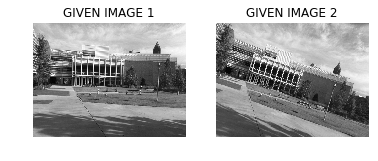

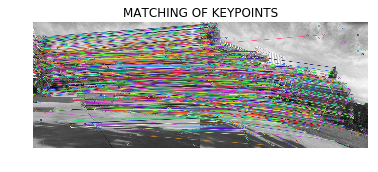

In [14]:
result1= CV.warpPerspective(X2,h, (X1.shape[1]+X2.shape[1],X2.shape[0]))
PL.figure(1)
PL.subplot(121)
PL.imshow(X1)
PL.axis('off')
PL.title('GIVEN IMAGE 1')

PL.subplot(122)
PL.imshow(X2)
PL.axis('off')
PL.title('GIVEN IMAGE 2')

PL.figure(2)
PL.imshow(I4)
PL.axis('off')
PL.title('MATCHING OF KEYPOINTS')

PL.figure(3)
PL.subplot(121)
PL.imshow(result1)
PL.axis('off')
PL.title('WRAPPED IMAGE')
result1[0:X1.shape[0], 0:X1.shape[1]] = X1
PL.subplot(122)
PL.imshow(result1)
PL.axis('off')
PL.title('OUTPUT IMAGE')


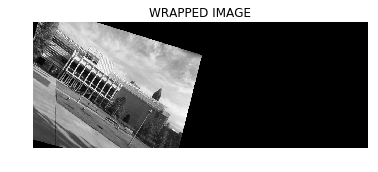

In [15]:
PL.imshow(result1)
PL.axis('off')
PL.title('WRAPPED IMAGE')
result1[0:X1.shape[0], 0:X1.shape[1]] = X1

Text(0.5,1,'OUTPUT IMAGE')

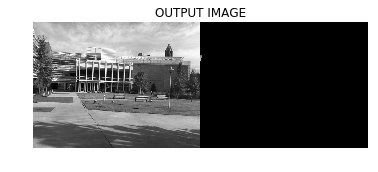

In [16]:
PL.imshow(result1)
PL.axis('off')
PL.title('OUTPUT IMAGE')

In [17]:
h

array([[ 9.96117891e-01, -2.99400906e-01,  3.91630458e+01],
       [ 3.03675716e-01,  9.67257431e-01, -6.23983451e+01],
       [ 7.38822095e-05, -8.12337269e-05,  1.00000000e+00]])